# Flight Price Prediction

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

# Importing Libraries

In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load Dataset

In [280]:
df=pd.read_excel("C:/Users/Lenovo/Downloads/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Gathering information about columns

In [281]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [282]:
df.shape

(10683, 11)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Checking Null values

In [284]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [285]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [286]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [287]:
df['Total_Stops']=df['Total_Stops'].fillna('missing')

In [288]:
df[df['Total_Stops']=='missing']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,missing,No info,7480


We may drop this row

In [289]:
df=df.dropna()

Null values are removed

checking unique values of catagorical columns and it's count 

In [290]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [291]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [292]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [293]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [294]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Though delhi and new delhi both are same we have to make it any one for further use.

In [295]:
df['Destination']=df['Destination'].replace('New Delhi','Delhi')

<ipython-input-295-b95aed2e1395>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Destination']=df['Destination'].replace('New Delhi','Delhi')


# Data Analysis

In [296]:
df['date']=df['Date_of_Journey'].apply(lambda x:int(x.split('/')[0]))

<ipython-input-296-bff07d5807ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=df['Date_of_Journey'].apply(lambda x:int(x.split('/')[0]))


In [297]:
df['month']=df['Date_of_Journey'].apply(lambda x:int(x.split('/')[1]))
df['year']=df['Date_of_Journey'].apply(lambda x:int(x.split('/')[2]))

<ipython-input-297-b997225ca380>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['Date_of_Journey'].apply(lambda x:int(x.split('/')[1]))
<ipython-input-297-b997225ca380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['Date_of_Journey'].apply(lambda x:int(x.split('/')[2]))


In [298]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')

<ipython-input-298-44b3ed25d783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')


In [299]:
df['Total_Stops']=df['Total_Stops'].apply(lambda x:int(x.split(' ')[0]))

<ipython-input-299-9504c412ef57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Stops']=df['Total_Stops'].apply(lambda x:int(x.split(' ')[0]))


year column has only one value(2019) so we drop it.
Though duration column shows time taken from one airport to destination.so we drop Dep-time and Arrival-time
Date of journey column is not necessery as we make it divide to gain some information

In [300]:
df=df.drop(['year','Dep_Time','Arrival_Time','Date_of_Journey'],axis=1)
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0,No info,7229,27,4
10681,Vistara,Banglore,Delhi,BLR → DEL,2h 40m,0,No info,12648,1,3


In [301]:
df['month'].unique()

array([3, 5, 6, 4], dtype=int64)

we have only 4 month from march to june

we have make duration column to one scale that is minute

In [302]:
df['hr']=df['Duration'].apply(lambda x:x.split(' ')[0])

In [303]:
df['min']=df['Duration'].apply(lambda x:x.split(' ')[-1])

In [304]:
x1=df[df['min']==df['hr']]
x2=df[df['min']!=df['hr']]

In [305]:
x1['min']=0

<ipython-input-305-ba9f9ce4898c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['min']=0


In [306]:
df=pd.concat([x1,x2],axis=0)
df=df.sort_index()

In [307]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,hr,min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,19h,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,5h,25m
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,4h,45m
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0,No info,4107,9,4,2h,30m
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0,No info,4145,27,4,2h,35m
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0,No info,7229,27,4,3h,0
10681,Vistara,Banglore,Delhi,BLR → DEL,2h 40m,0,No info,12648,1,3,2h,40m


In [308]:
df['hr']=df['hr'].apply(lambda x:int(x[0:-1]))

In [309]:
df['hr']=df['hr']*60
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,hr,min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,120,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,420,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,1140,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,300,25m
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,240,45m
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0,No info,4107,9,4,120,30m
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0,No info,4145,27,4,120,35m
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0,No info,7229,27,4,180,0
10681,Vistara,Banglore,Delhi,BLR → DEL,2h 40m,0,No info,12648,1,3,120,40m


In [310]:
df['min']=df['min'].apply(lambda x:0 if x==0 else int(x[0:-1]) )

In [311]:
df['Duration(min)']=df['hr']+df['min']
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,hr,min,Duration(min)
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,120,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,420,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,1140,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,300,25,325
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,240,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0,No info,4107,9,4,120,30,150
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0,No info,4145,27,4,120,35,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0,No info,7229,27,4,180,0,180
10681,Vistara,Banglore,Delhi,BLR → DEL,2h 40m,0,No info,12648,1,3,120,40,160


We may drop Duration,hr and min column

In [312]:
df=df.drop(['Duration','hr','min'],axis=1)
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,Duration(min)
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,325
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,1,3,285
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,9,4,150
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,27,4,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,27,4,180
10681,Vistara,Banglore,Delhi,BLR → DEL,0,No info,12648,1,3,160


We have to go for route column

In [313]:
df['Route1']=df['Route'].apply(lambda x:x.split('→')[0])

In [314]:
df['Route2']=df['Route'].apply(lambda x:x.split('→')[1])


In [315]:
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]

In [316]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,Duration(min),Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,170,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,445,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,1140,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,325,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,1,3,285,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,9,4,150,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,27,4,155,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,27,4,180,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,Delhi,BLR → DEL,0,No info,12648,1,3,160,BLR,DEL,NaN,NaN,NaN


We replace null values with None

In [317]:
df['Route1'].fillna("None",inplace=True)
df['Route2'].fillna("None",inplace=True)
df['Route3'].fillna("None",inplace=True)
df['Route4'].fillna("None",inplace=True)
df['Route5'].fillna("None",inplace=True)

In [318]:
#We may drop Route column
df=df.drop('Route',axis=1)
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,Duration(min),Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,Delhi,0,No info,3897,24,3,170,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,445,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,1140,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,325,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,Delhi,1,No info,13302,1,3,285,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,150,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,155,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,180,BLR,DEL,None,None,None
10681,Vistara,Banglore,Delhi,0,No info,12648,1,3,160,BLR,DEL,None,None,None


# Data Visualization

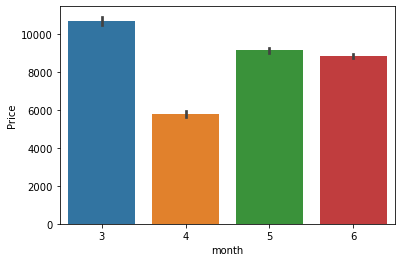

In [319]:
sns.barplot(x='month',y='Price',data=df)

in march month flight price is higher and in april price is lower

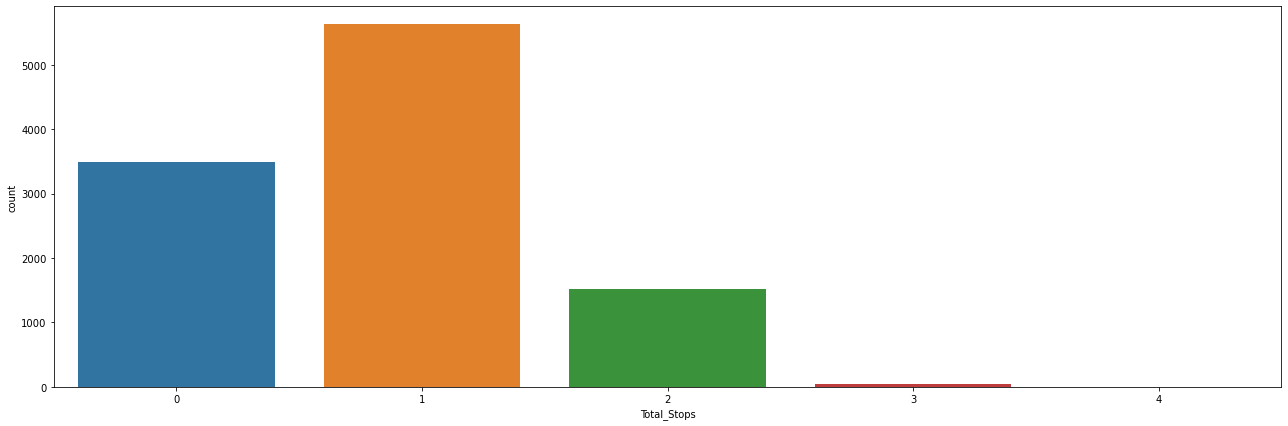

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [324]:
plt.figure(figsize=(22,7))
sns.countplot('Total_Stops',data=df)
plt.show()
df['Total_Stops'].value_counts()

Most flights are 1stop followed by nonstop

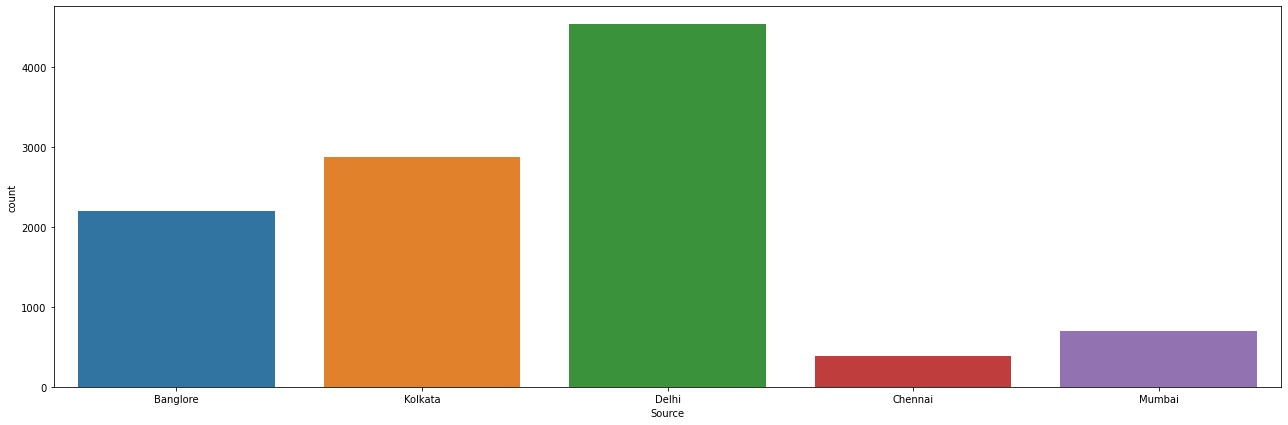

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [325]:
plt.figure(figsize=(22,7))
sns.countplot('Source',data=df)
plt.show()
df['Source'].value_counts()

From Delhi more flights are going to other airports followed by kolkata and Bangalore

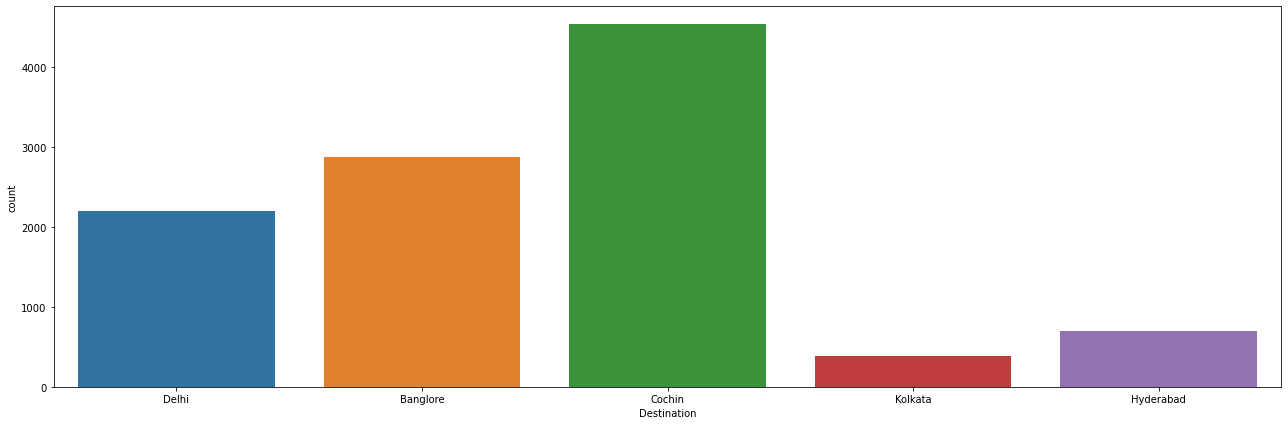

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [326]:
plt.figure(figsize=(22,7))
sns.countplot('Destination',data=df)
plt.show()
df['Destination'].value_counts()

more flights are coming to Coaching airport followed by bangalore and delhi.

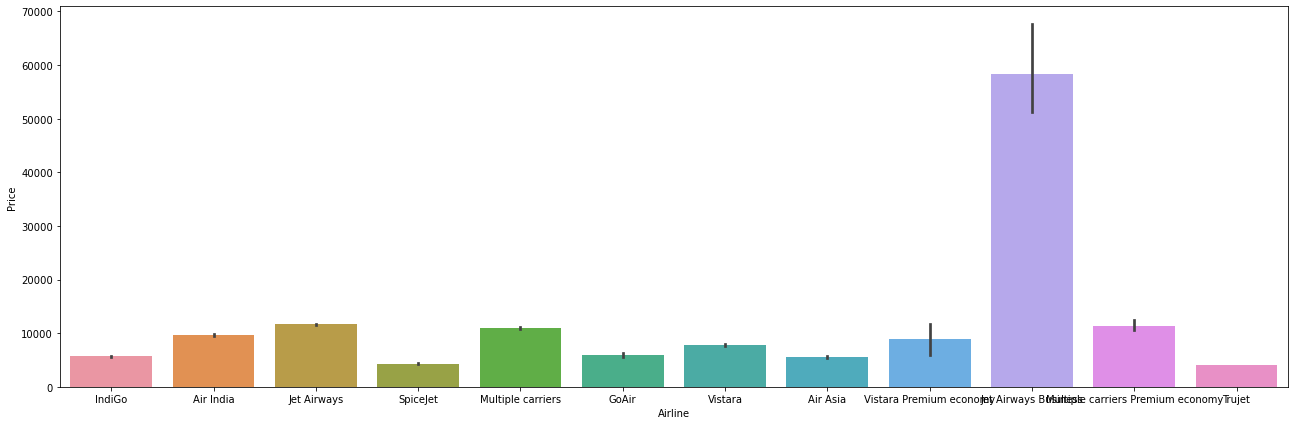

In [323]:
plt.figure(figsize=(22,7))
sns.barplot(x='Airline',y='Price',data=df)
plt.show()

Jet Airways Business flights have more price on tickets

In [328]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Airline']=le.fit_transform(df['Airline'])

In [329]:
df['Route1']=le.fit_transform(df['Route1'])
df['Route2']=le.fit_transform(df['Route2'])
df['Route3']=le.fit_transform(df['Route3'])
df['Route4']=le.fit_transform(df['Route4'])
df['Route5']=le.fit_transform(df['Route5'])

In [330]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [331]:
df['Additional_Info']=df['Additional_Info'].replace('No Info','No info')

In [332]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,Duration(min),Route1,Route2,Route3,Route4,Route5
0,3,0,2,0,No info,3897,24,3,170,0,13,29,13,5
1,1,3,0,2,No info,7662,1,5,445,2,25,1,3,5
2,4,2,1,2,No info,13882,9,6,1140,3,32,4,5,5
3,3,3,0,1,No info,6218,12,5,325,2,34,3,13,5
4,3,0,2,1,No info,13302,1,3,285,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,No info,4107,9,4,150,2,5,29,13,5
10679,1,3,0,0,No info,4145,27,4,155,2,5,29,13,5
10680,4,0,2,0,No info,7229,27,4,180,0,13,29,13,5
10681,10,0,2,0,No info,12648,1,3,160,0,13,29,13,5


In [333]:
df['Additional_Info']=le.fit_transform(df['Additional_Info'])

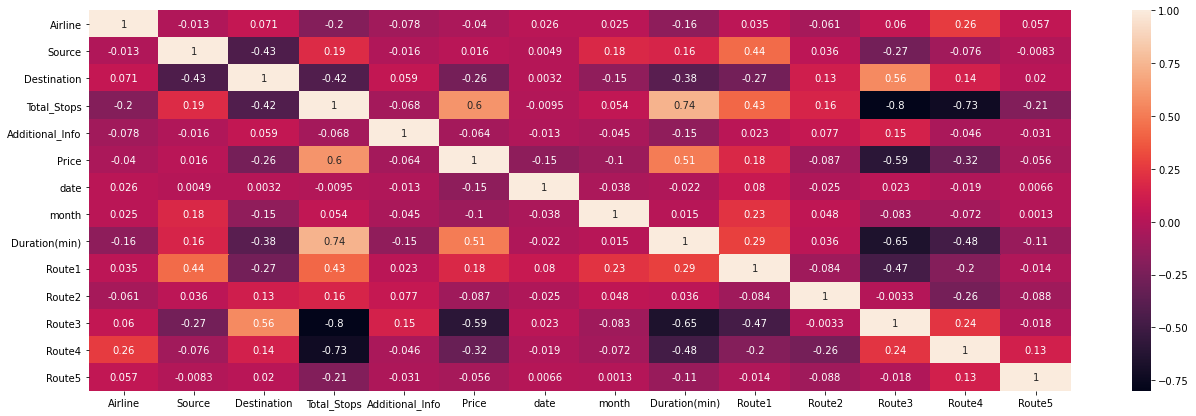

In [334]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

Duration and total_stops are highle +vely corelated with Price

In [335]:
x=df.drop(['Price','month','date'],axis=1)
y=df['Price']

In [336]:
x

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration(min),Route1,Route2,Route3,Route4,Route5
0,3,0,2,0,7,170,0,13,29,13,5
1,1,3,0,2,7,445,2,25,1,3,5
2,4,2,1,2,7,1140,3,32,4,5,5
3,3,3,0,1,7,325,2,34,3,13,5
4,3,0,2,1,7,285,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,7,150,2,5,29,13,5
10679,1,3,0,0,7,155,2,5,29,13,5
10680,4,0,2,0,7,180,0,13,29,13,5
10681,10,0,2,0,7,160,0,13,29,13,5


In [337]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [338]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [339]:
maxrs=0
maxacc=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best accuracy score is',maxacc,'on random_state',maxrs)

best accuracy score is 0.5180101647384983 on random_state 98


In [340]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=98)

In [341]:
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

In [342]:
ls=Lasso()
svr=SVR()
rd=Ridge()
els=ElasticNet()
ex=XGBRegressor()

In [343]:
model=[lr,ls,svr,rd,els,ex]

In [344]:
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print(i.score(x_train,y_train))
    print(r2_score(y_test,y_pred))

LinearRegression()
0.4519082832749771
0.5180101647384983
Lasso()
0.4519006303866059
0.5180449773526826
SVR()
0.1491633999827745
0.20296561614139552
Ridge()
0.45190731651730975
0.5180505862327149
ElasticNet()
0.4353950019425885
0.5106376322632893
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
0.8236339671351822
0.6936713182149503


In [345]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_Pred=rf.predict(x_test)
acc=r2_score(y_test,y_pred)
print(acc)
print(rf.score(x_train,y_train))

0.6936713182149503
0.8314218956069361


In [346]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
y_Pred=ad.predict(x_test)
acc=r2_score(y_test,y_pred)
acc

0.6936713182149503

In [347]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(x_train,y_train)
y_Pred=ext.predict(x_test)
acc=r2_score(y_test,y_pred)
acc

0.6936713182149503

finding best cv and cvscore of model

In [348]:
from sklearn.model_selection import cross_val_score

In [349]:
for i in range(2,10):
    cvscore=cross_val_score(rf,x,y,cv=i)
    print('best accuracy is',cvscore.mean(),'for',i)

best accuracy is 0.7048620875816911 for 2
best accuracy is 0.6936377905030676 for 3
best accuracy is 0.7078468355823718 for 4
best accuracy is 0.7077008294797965 for 5
best accuracy is 0.7100165285829284 for 6
best accuracy is 0.7045585088372837 for 7
best accuracy is 0.7093199523143146 for 8
best accuracy is 0.7056144244221484 for 9


In [352]:
cv=6

In [353]:
model=[lr,ls,rf,svr,rd,els,ex,ext,ad]

In [354]:
for i in model:
    cvscore=cross_val_score(i,x,y,cv=6)
    print('accuracy score of',i,'is',cvscore.mean())

accuracy score of LinearRegression() is 0.46323860775879
accuracy score of Lasso() is 0.46324113280829615
accuracy score of RandomForestRegressor() is 0.7105313172330107
accuracy score of SVR() is 0.16601621920066215
accuracy score of Ridge() is 0.4632410740659912
accuracy score of ElasticNet() is 0.44866293629527965
accuracy score of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) is 0.7273822548881608
accuracy score of ExtraTreesRegressor() is 0.706323322170908
accura

XGBRegressor is the best model for the dataset.so we are going to hypertuning it.best accuracy sore of model is 72.73%

# Hyperparameter tuning of model

In [356]:
from sklearn.model_selection import GridSearchCV

In [357]:
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [358]:
ex=XGBRegressor()
gscv = GridSearchCV(ex,parameters,cv =6,n_jobs = 5,verbose=True)
gscv.fit(x_train,y_train)

Fitting 6 folds for each of 9 candidates, totalling 54 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  54 out of  54 | elapsed:  1.7min finished


[11:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=6,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [359]:
gscv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.07,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [360]:
gscv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=6,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [362]:
gscv.best_score_

0.7431386117379758

In [363]:
ex=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=5,
             min_child_weight=4,monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

ex.fit(x_train,y_train)
y_pred=ex.predict(x_test)
r2_score(y_test,y_pred)

[11:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.7547434762589433

After hyperparametertuning our accuracy score moves from 72.73% to 75.47%

# Loading Test Dataset

In [364]:
df1=pd.read_excel("C:/Users/Lenovo/Downloads/Flight_Ticket_Participant_Datasets/Test_set.xlsx")
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


About the test dataset

In [365]:
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [366]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


# Checking Null values

In [367]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Null values are not present in test dataset

We have to prepare dataset for predict purpose

In [368]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Unique values of olumns and its count

In [369]:
df1['month']=df1['Date_of_Journey'].apply(lambda x:int(x.split('/')[1]))
df1['year']=df1['Date_of_Journey'].apply(lambda x:int(x.split('/')[2]))
df1['date']=df1['Date_of_Journey'].apply(lambda x:int(x.split('/')[0]))

In [370]:
df1['month'].unique()

array([6, 5, 3, 4], dtype=int64)

In [371]:
df1['year'].unique()

array([2019], dtype=int64)

In [372]:
df1['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [373]:
df1['Total_Stops']=df1['Total_Stops'].replace('non-stop','0 stop')

In [374]:
df1['Total_Stops']=df1['Total_Stops'].apply(lambda x:int(x.split(' ')[0]))

In [375]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,month,year,date
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,6,2019,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,5,2019,12
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,5,2019,21
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,5,2019,21
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,6,2019,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info,6,2019,6
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,No info,3,2019,27
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info,3,2019,6
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info,3,2019,6


In [376]:
df1['Route1']=df1['Route'].apply(lambda x:x.split('→')[0])
df1['Route2']=df1['Route'].apply(lambda x:x.split('→')[1])

In [377]:
df1['Route3']=df1['Route'].str.split('→').str[2]

In [378]:
df1['Route4']=df1['Route'].str.split('→').str[3]
df1['Route5']=df1['Route'].str.split('→').str[4]

In [379]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,month,year,date,Route1,Route2,Route3,Route4,Route5
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,6,2019,6,DEL,BOM,COK,NaN,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,5,2019,12,CCU,MAA,BLR,NaN,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,5,2019,21,DEL,BOM,COK,NaN,NaN
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,5,2019,21,DEL,BOM,COK,NaN,NaN
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,6,2019,24,BLR,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info,6,2019,6,CCU,DEL,BLR,NaN,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,No info,3,2019,27,CCU,BLR,NaN,NaN,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info,3,2019,6,DEL,BOM,COK,NaN,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info,3,2019,6,DEL,BOM,COK,NaN,NaN


In [380]:
df1['Route3']=df1['Route3'].fillna('None')
df1['Route4']=df1['Route4'].fillna('None')
df1['Route5']=df1['Route5'].fillna('None')

In [381]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,month,year,date,Route1,Route2,Route3,Route4,Route5
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,6,2019,6,DEL,BOM,COK,None,None
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,5,2019,12,CCU,MAA,BLR,None,None
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,5,2019,21,DEL,BOM,COK,None,None
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,5,2019,21,DEL,BOM,COK,None,None
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,6,2019,24,BLR,DEL,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info,6,2019,6,CCU,DEL,BLR,None,None
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,No info,3,2019,27,CCU,BLR,None,None,None
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info,3,2019,6,DEL,BOM,COK,None,None
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info,3,2019,6,DEL,BOM,COK,None,None


We have to drop Date_of_Journey,Route,date,month,year column as we extract information in train dataset

In [382]:
df1=df1.drop(['Date_of_Journey','Route','date','month','year'],axis=1)
df1

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1,No info,DEL,BOM,COK,None,None
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1,No info,CCU,MAA,BLR,None,None
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,DEL,BOM,COK,None,None
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1,No info,DEL,BOM,COK,None,None
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,0,No info,BLR,DEL,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,20:30,20:25 07 Jun,23h 55m,1,No info,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,14:20,16:55,2h 35m,0,No info,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,21:50,04:25 07 Mar,6h 35m,1,No info,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,04:00,19:15,15h 15m,1,No info,DEL,BOM,COK,None,None


In [383]:
df1['hr']=df1['Duration'].apply(lambda x:x.split(' ')[0])
df1['min']=df1['Duration'].apply(lambda x:x.split(' ')[-1])

In [384]:
df1

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5,hr,min
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1,No info,DEL,BOM,COK,None,None,10h,55m
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1,No info,CCU,MAA,BLR,None,None,4h,4h
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,DEL,BOM,COK,None,None,23h,45m
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1,No info,DEL,BOM,COK,None,None,13h,13h
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,0,No info,BLR,DEL,None,None,None,2h,50m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,20:30,20:25 07 Jun,23h 55m,1,No info,CCU,DEL,BLR,None,None,23h,55m
2667,IndiGo,Kolkata,Banglore,14:20,16:55,2h 35m,0,No info,CCU,BLR,None,None,None,2h,35m
2668,Jet Airways,Delhi,Cochin,21:50,04:25 07 Mar,6h 35m,1,No info,DEL,BOM,COK,None,None,6h,35m
2669,Air India,Delhi,Cochin,04:00,19:15,15h 15m,1,No info,DEL,BOM,COK,None,None,15h,15m


In [385]:
x1=df1[df1['hr']==df1['min']]
x2=df1[df1['hr']!=df1['min']]

In [386]:
x1['min']=0

<ipython-input-386-ba9f9ce4898c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['min']=0


In [387]:
df1=pd.concat([x1,x2],axis=0).sort_index()
df1

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5,hr,min
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1,No info,DEL,BOM,COK,None,None,10h,55m
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1,No info,CCU,MAA,BLR,None,None,4h,0
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,DEL,BOM,COK,None,None,23h,45m
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1,No info,DEL,BOM,COK,None,None,13h,0
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,0,No info,BLR,DEL,None,None,None,2h,50m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,20:30,20:25 07 Jun,23h 55m,1,No info,CCU,DEL,BLR,None,None,23h,55m
2667,IndiGo,Kolkata,Banglore,14:20,16:55,2h 35m,0,No info,CCU,BLR,None,None,None,2h,35m
2668,Jet Airways,Delhi,Cochin,21:50,04:25 07 Mar,6h 35m,1,No info,DEL,BOM,COK,None,None,6h,35m
2669,Air India,Delhi,Cochin,04:00,19:15,15h 15m,1,No info,DEL,BOM,COK,None,None,15h,15m


In [388]:

df1['hr']=df1['hr'].apply(lambda x:int(x[0:-1]))


In [389]:
df1['min']=df1['min'].apply(lambda x:0 if x==0 else int(x[0:-1]) )

In [390]:
df1['hr']=df1['hr']*60

In [391]:
df1['Duration(min)']=df1['hr']+df1['min']

In [392]:
df1

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5,hr,min,Duration(min)
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1,No info,DEL,BOM,COK,None,None,600,55,655
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1,No info,CCU,MAA,BLR,None,None,240,0,240
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,DEL,BOM,COK,None,None,1380,45,1425
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1,No info,DEL,BOM,COK,None,None,780,0,780
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,0,No info,BLR,DEL,None,None,None,120,50,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,20:30,20:25 07 Jun,23h 55m,1,No info,CCU,DEL,BLR,None,None,1380,55,1435
2667,IndiGo,Kolkata,Banglore,14:20,16:55,2h 35m,0,No info,CCU,BLR,None,None,None,120,35,155
2668,Jet Airways,Delhi,Cochin,21:50,04:25 07 Mar,6h 35m,1,No info,DEL,BOM,COK,None,None,360,35,395
2669,Air India,Delhi,Cochin,04:00,19:15,15h 15m,1,No info,DEL,BOM,COK,None,None,900,15,915


We may drop Dep-time,arrival-time,duration,hr,min column

In [393]:
df1=df1.drop(['Dep_Time','Arrival_Time','Duration','hr','min'],axis=1)
df1

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5,Duration(min)
0,Jet Airways,Delhi,Cochin,1,No info,DEL,BOM,COK,None,None,655
1,IndiGo,Kolkata,Banglore,1,No info,CCU,MAA,BLR,None,None,240
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,DEL,BOM,COK,None,None,1425
3,Multiple carriers,Delhi,Cochin,1,No info,DEL,BOM,COK,None,None,780
4,Air Asia,Banglore,Delhi,0,No info,BLR,DEL,None,None,None,170
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,No info,CCU,DEL,BLR,None,None,1435
2667,IndiGo,Kolkata,Banglore,0,No info,CCU,BLR,None,None,None,155
2668,Jet Airways,Delhi,Cochin,1,No info,DEL,BOM,COK,None,None,395
2669,Air India,Delhi,Cochin,1,No info,DEL,BOM,COK,None,None,915


We have to labelencode catagorical columns

In [394]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Airline']=le.fit_transform(df1['Airline'])
df1['Source']=le.fit_transform(df1['Source'])
df1['Destination']=le.fit_transform(df1['Destination'])
df1['Additional_Info']=le.fit_transform(df1['Additional_Info'])
df1['Route1']=le.fit_transform(df1['Route1'])
df1['Route2']=le.fit_transform(df1['Route2'])

In [395]:
df1['Route3']=le.fit_transform(df1['Route3'])
df1['Route4']=le.fit_transform(df1['Route4'])
df1['Route5']=le.fit_transform(df1['Route5'])

In [396]:
df1

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5,Duration(min)
0,4,2,1,1,5,3,7,5,9,4,655
1,3,3,0,1,5,2,29,3,9,4,240
2,4,2,1,1,3,3,7,5,9,4,1425
3,6,2,1,1,5,3,7,5,9,4,780
4,0,0,2,0,5,0,13,27,9,4,170
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,5,2,14,3,9,4,1435
2667,3,3,0,0,5,2,5,27,9,4,155
2668,4,2,1,1,5,3,7,5,9,4,395
2669,1,2,1,1,5,3,7,5,9,4,915


We have to make order of columns as train dataset

In [397]:
df1=df1[['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Duration(min)', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5']]
df1

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration(min),Route1,Route2,Route3,Route4,Route5
0,4,2,1,1,5,655,3,7,5,9,4
1,3,3,0,1,5,240,2,29,3,9,4
2,4,2,1,1,3,1425,3,7,5,9,4
3,6,2,1,1,5,780,3,7,5,9,4
4,0,0,2,0,5,170,0,13,27,9,4
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,5,1435,2,14,3,9,4
2667,3,3,0,0,5,155,2,5,27,9,4
2668,4,2,1,1,5,395,3,7,5,9,4
2669,1,2,1,1,5,915,3,7,5,9,4


Now our test dataset is ready to be predicted

# Predict Test Dataset

In [398]:
pred_value=ex.predict(df1)
pred_value

array([10512.007 ,  6567.5645, 37717.387 , ..., 11709.21  , 10214.594 ,
        9724.962 ], dtype=float32)

In [399]:
pred_value=pd.DataFrame(pred_value,columns=['Price_p'])
pred_value

,Price_p
0,10512.006836
1,6567.564453
2,37717.386719
3,11752.291016
4,4391.103516
...,...
2666,11242.139648
2667,5429.240234
2668,11709.209961
2669,10214.593750


# Saving Model

In [400]:
import joblib
joblib.dump(ex,'flightpred.obj')

['flightpred.obj']

In [401]:
fl=joblib.load('flightpred.obj')

In [404]:
fl.score(x_train,y_train)

0.7999445832960793